#### So today we are gonna dive deeper into Pandas with the same dataset of last day and try to recap the concept and analyse more

### Doing the usual stuff

In [11]:
import pandas as pd

df=pd.read_csv('Pokemon_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


#### Lets start analysing with some questions and answers

##### How many pokemons exists with attack value greater than 150?

In [ ]:
df.loc[df['Attack']>150].shape
(df['Attack']>150).sum()
#answer is 18 by two approaches

np.int64(18)

#### Select all pokemons with a speed of 10 or less

In [5]:
df.loc[df['Speed']<=10]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
359,328,Trapinch,Ground,NaN,45,100,45,45,45,10,3,False
486,438,Bonsly,Rock,NaN,50,80,95,10,45,10,4,False
495,446,Munchlax,Normal,NaN,135,85,40,40,85,5,4,False
658,597,Ferroseed,Grass,Steel,44,50,91,24,86,10,5,False


##### How many have a sp. def value 25 or less?

In [ ]:
df.loc[df['Sp. Def']<=25]
df.loc[df['Sp. Def']<=25].shape
#answer is 18

(18, 12)

#### Select all legendary pokemons and store in a different df

In [ ]:
df.loc[df['Legendary']==True]
legendaryDf=df.loc[df['Legendary']] #if not legendary just do ~df['Legendary']
legendaryDf

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


#### Who is the pokemon with a very strong defence but very low attack ?

In [ ]:
df.loc[(df['Defense'].max())]
#or
df.sort_values(by=['Defense','Attack'],ascending=[0,1]).head()
#answer is Shuckle

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
224,208,SteelixMega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,306,AggronMega Aggron,Steel,NaN,70,140,230,60,80,50,3,False
223,208,Steelix,Steel,Ground,75,85,200,55,65,30,2,False
414,377,Regirock,Rock,NaN,80,100,200,50,100,50,3,True


#### How many fire-Flying pokemons are there?
###### Type 1= Fire Type 2= Flying

In [ ]:
df.loc[
    (df['Type 1']=='Fire') & 
    (df['Type 2']=='Flying')
]
#answer is 6

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
158,146,Moltres,Fire,Flying,90,100,90,125,85,90,1,True
270,250,Ho-oh,Fire,Flying,106,130,90,110,154,90,2,True
730,662,Fletchinder,Fire,Flying,62,73,55,56,52,84,6,False
731,663,Talonflame,Fire,Flying,78,81,71,74,69,126,6,False


#### How many 'Poison' pokemon are there across both types?
EIther type 1 or type 2 is poison

In [ ]:
df.loc[
    (df['Type 1']=='Poison') |
    (df['Type 2']=='Poison')
]

df.query("`Type 1`=='Poison' or `Type 2`=='Poison'") #in query we write Column name in `` and use or and not instead of | & ~
#answer is 62

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
16,13,Weedle,Bug,Poison,40,35,30,20,20,50,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
630,569,Garbodor,Poison,NaN,80,95,82,60,82,75,5,False
651,590,Foongus,Grass,Poison,69,55,45,55,55,15,5,False
652,591,Amoonguss,Grass,Poison,114,85,70,85,80,30,5,False
760,690,Skrelp,Poison,Water,50,60,60,60,60,30,6,False


#### What pokemon of Type 1 ice has the strongest defense?

In [35]:
df.loc[
    (df['Type 1']=='Ice') 
].sort_values(['Defense'],ascending=False).head()
#answer is Avalugg

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
789,713,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False
522,471,Glaceon,Ice,NaN,65,60,110,130,95,65,4,False
156,144,Articuno,Ice,Flying,90,85,100,95,125,85,1,True
415,378,Regice,Ice,NaN,80,50,100,100,200,50,3,True
400,365,Walrein,Ice,Water,110,80,90,95,90,65,3,False


#### Most common type 1 of legendary pokemons?

In [ ]:
df.loc[(df['Legendary']==True)]
df.loc[df['Legendary'],'Type 1'].value_counts()
#answer is Psychic     14

Type 1
Psychic     14
Dragon      12
Fire         5
Rock         4
Water        4
Steel        4
Electric     4
Ground       4
Grass        3
Ice          2
Normal       2
Ghost        2
Dark         2
Flying       2
Fairy        1
Name: count, dtype: int64

<Axes: xlabel='Type 1'>

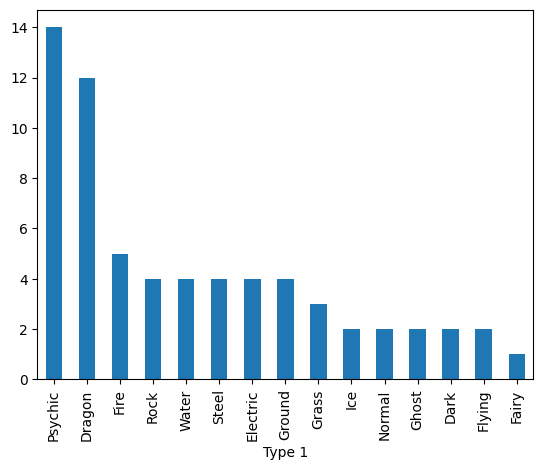

In [51]:
df.loc[df['Legendary'],'Type 1'].value_counts().plot(kind='bar')

#### Whats the most powerfull pokemon from the first 3 generation of type water?

In [60]:
df['Total']= df['HP']+df['Attack']+df['Defense']+df['Sp. Atk']+df['Sp. Def']+df['Speed'] #adding a new column Total to df

df.loc[
    (df['Generation']<=3) & 
    (
        (df['Type 1']=='Water') | 
        (df['Type 2']=='Water')
    )
].sort_values(by='Total',ascending=False)
#or
df.loc[
    (df['Generation'].isin([1,2,3])) & #is in 1 or 2 or 3
    (
        (df['Type 1']=='Water') | 
        (df['Type 2']=='Water')
    )
].sort_values(by='Total',ascending=False)
#answer is KyogrePrimal Kyogre

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,770
421,382,Kyogre,Water,NaN,100,100,90,150,140,90,3,True,670
141,130,GyaradosMega Gyarados,Water,Dark,95,155,109,70,130,81,1,False,640
283,260,SwampertMega Swampert,Water,Ground,100,150,110,95,110,70,3,False,635
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,183,Marill,Water,Fairy,70,20,50,20,50,40,2,False,250
293,270,Lotad,Water,Grass,40,30,30,40,50,30,3,False,220
209,194,Wooper,Water,Ground,55,45,45,25,25,15,2,False,210
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False,200


#### Whats the most powerful DRagon from the last two generations?

In [ ]:
df.loc[(
    ((df['Type 1']=='Dragon') |
    (df['Type 2']=='Dragon')) &
    (df['Generation'].isin([5,6]))
)].sort_values('Total',ascending=False)

#Answer is KyuremWhite Kyurem

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
712,646,KyuremWhite Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True,700
711,646,KyuremBlack Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True,700
707,644,Zekrom,Dragon,Electric,100,150,120,120,100,90,5,True,680
706,643,Reshiram,Dragon,Fire,100,120,100,150,120,90,5,True,680
710,646,Kyurem,Dragon,Ice,125,130,90,130,90,95,5,True,660
776,706,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False,600
696,635,Hydreigon,Dark,Dragon,92,105,90,125,90,98,5,False,600
794,718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True,600
673,612,Haxorus,Dragon,NaN,76,147,90,60,70,97,5,False,540
791,715,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False,535


#### Select the most powerful fire type pokemon: All pokemon having attack value above 100 and type 1 is Fire

In [68]:
powerfullFireDf=df.loc[(
    (df['Attack']>=100) &
    (df['Type 1']=='Fire')
)].sort_values(by='Total',ascending=False) #overall powerfull
#Ho-oh
powerfullFireDf

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
270,250,Ho-oh,Fire,Flying,106,130,90,110,154,90,2,True,680
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
279,257,BlazikenMega Blaziken,Fire,Fighting,80,160,80,130,80,100,3,False,630
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,600
158,146,Moltres,Fire,Flying,90,100,90,125,85,90,1,True,580
263,244,Entei,Fire,NaN,115,115,85,90,75,100,2,True,580
354,323,CameruptMega Camerupt,Fire,Ground,70,120,100,145,105,20,3,False,560
64,59,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False,555
437,392,Infernape,Fire,Fighting,76,104,71,104,71,108,4,False,534


In [67]:
powerfullFireDf=df.loc[(
    (df['Attack']>=100) &
    (df['Type 1']=='Fire')
)].sort_values(by='Attack',ascending=False) #powerfull wrt Attack
powerfullFireDf

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
279,257,BlazikenMega Blaziken,Fire,Fighting,80,160,80,130,80,100,3,False,630
615,555,DarmanitanStandard Mode,Fire,NaN,105,140,55,30,55,95,5,False,480
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
147,136,Flareon,Fire,NaN,65,130,60,95,110,65,1,False,525
270,250,Ho-oh,Fire,Flying,106,130,90,110,154,90,2,True,680
559,500,Emboar,Fire,Fighting,110,123,65,100,65,65,5,False,528
278,257,Blaziken,Fire,Fighting,80,120,70,110,70,80,3,False,530
354,323,CameruptMega Camerupt,Fire,Ground,70,120,100,145,105,20,3,False,560
263,244,Entei,Fire,NaN,115,115,85,90,75,100,2,True,580
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,600


#### Select all water type and Flying Type pokemon: T1=Water T2=Flying
store in waterFlyingDf

In [69]:
waterFlyingDf=df.loc[(
    (df['Type 1']=='Water') &
    (df['Type 2']=='Flying')
)]
waterFlyingDf

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
140,130,Gyarados,Water,Flying,95,125,79,60,100,81,1,False,540
244,226,Mantine,Water,Flying,65,40,70,80,140,70,2,False,465
301,278,Wingull,Water,Flying,40,30,30,55,30,85,3,False,270
302,279,Pelipper,Water,Flying,60,50,100,85,70,65,3,False,430
508,458,Mantyke,Water,Flying,45,20,50,60,120,50,4,False,345
641,580,Ducklett,Water,Flying,62,44,50,44,50,55,5,False,305
642,581,Swanna,Water,Flying,75,87,63,87,63,98,5,False,473


#### Select specific colimns of legendary pokemons of type fire:
Perform a selection in your df of all the legendary pokemons that are of type 1 fire.but select only the columns Name, Attack and Generation and store in legendaryFireDf

In [76]:
legendaryFireDf=df.loc[(
    (
        (df['Type 1']=='Fire')&
        (df['Legendary']==True)
    ),
    ['Name','Attack','Generation']
)].reset_index()
legendaryFireDf

,index,Name,Attack,Generation
0,158,Moltres,100,1
1,263,Entei,115,2
2,270,Ho-oh,130,2
3,542,Heatran,90,4
4,799,Volcanion,110,6


#### Select slow and fast pokemons :
speed below 5% slow
speed above 95% fast
store in slowFastDf

In [ ]:
bottom5=df['Speed'].quantile(.05) #first 5% speed slowest
bottom5

np.float64(25.0)

In [ ]:
top5=df['Speed'].quantile(.95) #last 5% speed fastest
top5

np.float64(115.0)

In [ ]:
slowFastDf=df.loc[(
    (df['Speed']>=top5) |
    (df['Speed']<=bottom5)
)] 
slowFastDf

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
19,15,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,495
23,18,PidgeotMega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False,579
44,39,Jigglypuff,Normal,Fairy,115,45,20,45,25,20,1,False,270
51,46,Paras,Bug,Grass,35,70,55,45,55,25,1,False,285
56,51,Dugtrio,Ground,NaN,35,80,50,50,70,120,1,False,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,658,Greninja,Water,Dark,72,95,67,103,71,122,6,False,530
731,663,Talonflame,Fire,Flying,78,81,71,74,69,126,6,False,499
752,682,Spritzee,Fairy,NaN,78,52,60,63,65,23,6,False,341
771,701,Hawlucha,Fighting,Flying,78,92,75,74,63,118,6,False,500
